<a href="https://colab.research.google.com/github/HiInvoker/machineLearning/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

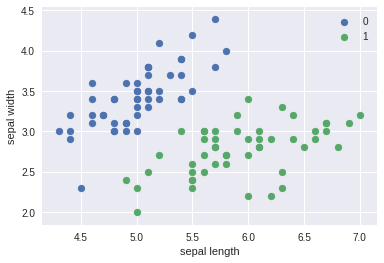

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [0]:
def getData(df):
  data = np.array(df.iloc[:100, [0, 1, -1]])
  X, y = data[:, :-1], data[:, -1]
  y = np.array([1 if i == 1 else -1 for i in y])
  return X, y

In [0]:
X, y = getData(df)
data = np.array(df.iloc[:100, [0, 1, -1]])

In [0]:
class Perceptron:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float64)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data
    
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'        
    def score(self):
        pass

In [11]:
perceptron = Perceptron()
perceptron.fit(X, y)

'Perceptron Model!'

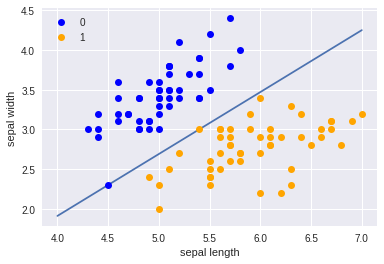

In [12]:
x_points = np.linspace(4, 7,10)   #产生等差数列（10个点）
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


In [0]:
#sklearn 的感知机模型

from sklearn.linear_model import Perceptron

In [15]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

# Weights assigned to the features.
print(clf.coef_)

# 截距 Constants in decision function.
print(clf.intercept_)

[[  74.6 -127.2]]
[0.]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


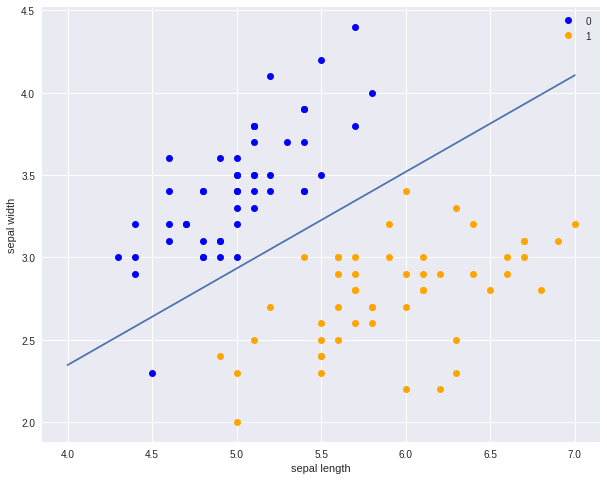

In [19]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]

plt.figure(figsize = (10, 8))
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()